# Практическая работа #2. Выполнил: Мешалкин Никита

Импорт необходимых для разработки:

In [1]:
import os

import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import time
from torchvision.utils import make_grid
import torch.nn as nn

In [2]:
torch.cuda.is_available()

True

Загрузка датасета (CIFAR10):

In [3]:
def download_data(path_to_download):
  train_dataset = torchvision.datasets.CIFAR10(
      root = path_to_download, train = True, download = True,
      transform = torchvision.transforms.ToTensor()
  )
  test_dataset = torchvision.datasets.CIFAR10(
      root = path_to_download, train = False, download = True,
      transform = torchvision.transforms.ToTensor()
  )
  return train_dataset, test_dataset

train_dataset, test_dataset = download_data(os.getcwd())

Files already downloaded and verified
Files already downloaded and verified


Проведем проверку корректности данных:



In [4]:
def get_data_info():
  print(f"Classes: {train_dataset.classes}")
  print(f"Number of classes: {len(train_dataset.classes)}")
  print(f"Number of train samples: {train_dataset.data.shape[0]}")
  print(f"Number of test samples: {test_dataset.data.shape[0]}")
  print(f"Shape of each image: {test_dataset.data.shape[1:4]}")
  print(f"Distribution train to test samples: {int(train_dataset.data.shape[0] / test_dataset.data.shape[0])}:{1}")

get_data_info()

Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Number of classes: 10
Number of train samples: 50000
Number of test samples: 10000
Shape of each image: (32, 32, 3)
Distribution train to test samples: 5:1


Експерименты:

Введем функцию проверку точности:

In [5]:
def check_accuracy(data_loader, model):
    res = 0
    number_samples = 0
    with torch.no_grad():
        for images, labels in data_loader:
            labels = labels.to(torch.device("cuda:0"))
            output = model(images.to(torch.device("cuda:0")))
            _, predicted = torch.max(output.data, 1)
            number_samples += labels.size(0)
            res += (predicted == labels).sum()
    return res / number_samples

Введем функцию обучения модели:

In [6]:
def train_model(model, train_data_loader, learning_rate = 0.2, num_epochs = 20, loss_function = torch.nn.CrossEntropyLoss()):
  result_time = 0

  model.to(torch.device("cuda:0"))
  optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

  for epoch in range(num_epochs):
      start = time.time()
      for i, (images, labels) in enumerate(train_data_loader):
          outputs = model(images.to(torch.device("cuda:0")))
          loss = loss_function(outputs, labels.to(torch.device("cuda:0")))
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
      epoch_time = time.time() - start
      result_time += epoch_time

      print(f'Epoch {epoch}')
      print(f'accuracy on train data : {check_accuracy(train_data_loader, model)}')
  return check_accuracy(train_data_loader, model)


### 1. ResNet34

In [7]:
from torchvision.models import ResNet34_Weights, resnet34

In [ ]:
weights = ResNet34_Weights.DEFAULT
model = resnet34(weights=weights)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Применяем трансформации к данным

In [ ]:
transform = weights.transforms()


train_dataset = torchvision.datasets.CIFAR10(
    root=os.getcwd(), train=True, download=True, transform=transform)

train_data_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=50, shuffle=True)


test_dataset = torchvision.datasets.CIFAR10(
    root=os.getcwd(), train=False, download=True, transform=transform)

test_data_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=50, shuffle=False)
#for freezing layers
for param in model.parameters():
    param.requires_grad = False



Files already downloaded and verified
Files already downloaded and verified


#### Modification #1: basic classifer

In [ ]:
num_of_classes = 10
model.fc = torch.nn.Linear(512, num_of_classes)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
train_accuracy_resnet34_first = train_model(model, train_data_loader, 0.1, num_epochs = 5, loss_function = torch.nn.CrossEntropyLoss())

Epoch 0
accuracy on train data : 0.8666799664497375
Epoch 1
accuracy on train data : 0.8609399795532227
Epoch 2
accuracy on train data : 0.8863599896430969
Epoch 3
accuracy on train data : 0.8172599673271179
Epoch 4
accuracy on train data : 0.8712799549102783


In [ ]:
test_accuracy_resnet34_first = check_accuracy(test_data_loader, model)
test_accuracy_resnet34_first

tensor(0.8549, device='cuda:0')

#### Modification #2: Modified classifieer

In [ ]:
weights = ResNet34_Weights.DEFAULT
model = resnet34(weights=weights)
model.eval()

#for freezing layers
for param in model.parameters():
    param.requires_grad = False

In [ ]:
num_of_classes = 10
model.fc = torch.nn.Sequential(
    torch.nn.Linear(512, 256),
    torch.nn.GELU(),
    torch.nn.Dropout(0.3, inplace=True),
    torch.nn.Linear(256, num_of_classes),
)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
train_accuracy_resnet34_modified = train_model(model, train_data_loader, 0.1, num_epochs = 5, loss_function = torch.nn.CrossEntropyLoss())

Epoch 0
accuracy on train data : 0.8732799887657166
Epoch 1
accuracy on train data : 0.8829799890518188
Epoch 2
accuracy on train data : 0.9057999849319458
Epoch 3
accuracy on train data : 0.8996599912643433
Epoch 4
accuracy on train data : 0.9204199910163879


In [ ]:
test_accuracy_resnet34_modified = check_accuracy(test_data_loader, model)
test_accuracy_resnet34_modified

tensor(0.8889, device='cuda:0')

### 2. Efficientnet_v2_s

In [8]:
from torchvision.models import EfficientNet_V2_S_Weights, efficientnet_v2_s

In [9]:
weights = EfficientNet_V2_S_Weights.DEFAULT
model = efficientnet_v2_s(weights=weights)
model.eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

Применяем трансформации к данным

In [13]:
transform = weights.transforms()


train_dataset = torchvision.datasets.CIFAR10(
    root=os.getcwd(), train=True, download=True, transform=transform)

train_data_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=32, shuffle=True)


test_dataset = torchvision.datasets.CIFAR10(
    root=os.getcwd(), train=False, download=True, transform=transform)

test_data_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=32, shuffle=False)
#for freezing layers
for param in model.parameters():
    param.requires_grad = False


Files already downloaded and verified
Files already downloaded and verified


#### Modification #1: base classifier

In [14]:
num_of_classes = 10
model.classifier = torch.nn.Linear(1280, num_of_classes)
model.eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [15]:
train_accuracy_efficientnet_v2_s_first = train_model(model, train_data_loader, 0.1, num_epochs = 5, loss_function = torch.nn.CrossEntropyLoss())

Epoch 0
accuracy on train data : 0.9135800004005432
Epoch 1
accuracy on train data : 0.9254399538040161
Epoch 2
accuracy on train data : 0.9300199747085571
Epoch 3
accuracy on train data : 0.930079996585846
Epoch 4
accuracy on train data : 0.9373599886894226


In [17]:
test_accuracy_efficientnet_v2_s_first = check_accuracy(test_data_loader, model)
test_accuracy_efficientnet_v2_s_first

tensor(0.9187, device='cuda:0')

#### Modification #2: Modified classifier

In [ ]:
weights = EfficientNet_V2_S_Weights.DEFAULT
model = efficientnet_v2_s(weights=weights)
model.eval()

In [ ]:
num_of_classes = 10
model.classifier = torch.nn.Sequential(
    torch.nn.Linear(1280, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5, inplace=True),
    torch.nn.Linear(256, num_of_classes),
)
model.eval()

In [ ]:
transform = weights.transforms()


train_dataset = torchvision.datasets.CIFAR10(
    root=os.getcwd(), train=True, download=True, transform=transform)

train_data_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True)


test_dataset = torchvision.datasets.CIFAR10(
    root=os.getcwd(), train=False, download=True, transform=transform)

test_data_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=128, shuffle=False)
#for freezing layers
for param in model.parameters():
    param.requires_grad = False

In [ ]:
train_accuracy_efficientnet_v2_s_modified = train_model(model, train_data_loader, 0.1, num_epochs = 5, loss_function = torch.nn.CrossEntropyLoss())

In [ ]:
test_accuracy_efficientnet_v2_s_modified  = check_accuracy(test_data_loader, model)
test_accuracy_efficientnet_v2_s_modified 

### 3. ResNet18

In [18]:
from torchvision.models import ResNet18_Weights,resnet18

In [19]:
weights = ResNet18_Weights.DEFAULT
model = resnet18(weights=weights)
model.eval()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Никита/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100.0%


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [20]:
transform = weights.transforms()


train_dataset = torchvision.datasets.CIFAR10(
    root=os.getcwd(), train=True, download=True, transform=transform)

train_data_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True)


test_dataset = torchvision.datasets.CIFAR10(
    root=os.getcwd(), train=False, download=True, transform=transform)

test_data_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=64, shuffle=False)
#for freezing layers
for param in model.parameters():
    param.requires_grad = False


Files already downloaded and verified
Files already downloaded and verified


#### Modification #1: Base classifier

In [22]:
num_classes = 10
model.fc = torch.nn.Linear(512, num_classes)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [24]:
train_accuracy_resnet18_first = train_model(model, train_data_loader, 0.1, num_epochs = 2, loss_function = torch.nn.CrossEntropyLoss())

Epoch 0
accuracy on train data : 0.7796599864959717
Epoch 1
accuracy on train data : 0.8652799725532532


In [25]:
test_accuracy_resnet18_first= check_accuracy(test_data_loader, model)
test_accuracy_resnet18_first

tensor(0.8510, device='cuda:0')

#### Modification #2: Modified classifier

In [26]:
weights = ResNet18_Weights.DEFAULT
model = resnet18(weights=weights)
model.eval()

#for freezing layers
for param in model.parameters():
    param.requires_grad = False

In [27]:
num_of_classes = 10
model.fc = torch.nn.Sequential(
    torch.nn.Linear(512, 256),
    torch.nn.GELU(),
    torch.nn.Dropout(0.3, inplace=True),
    torch.nn.Linear(256, num_of_classes),
)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [28]:
train_accuracy_resnet18_modified = train_model(model, train_data_loader, 0.1, num_epochs = 2, loss_function = torch.nn.CrossEntropyLoss())

Epoch 0
accuracy on train data : 0.8253600001335144
Epoch 1
accuracy on train data : 0.8242999911308289


In [29]:
test_accuracy_resnet18_modified = check_accuracy(test_data_loader, model)
test_accuracy_resnet18_modified

tensor(0.8075, device='cuda:0')

### Results

In [31]:
float(test_accuracy_resnet18_modified)

0.8075000047683716

<BarContainer object of 6 artists>

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

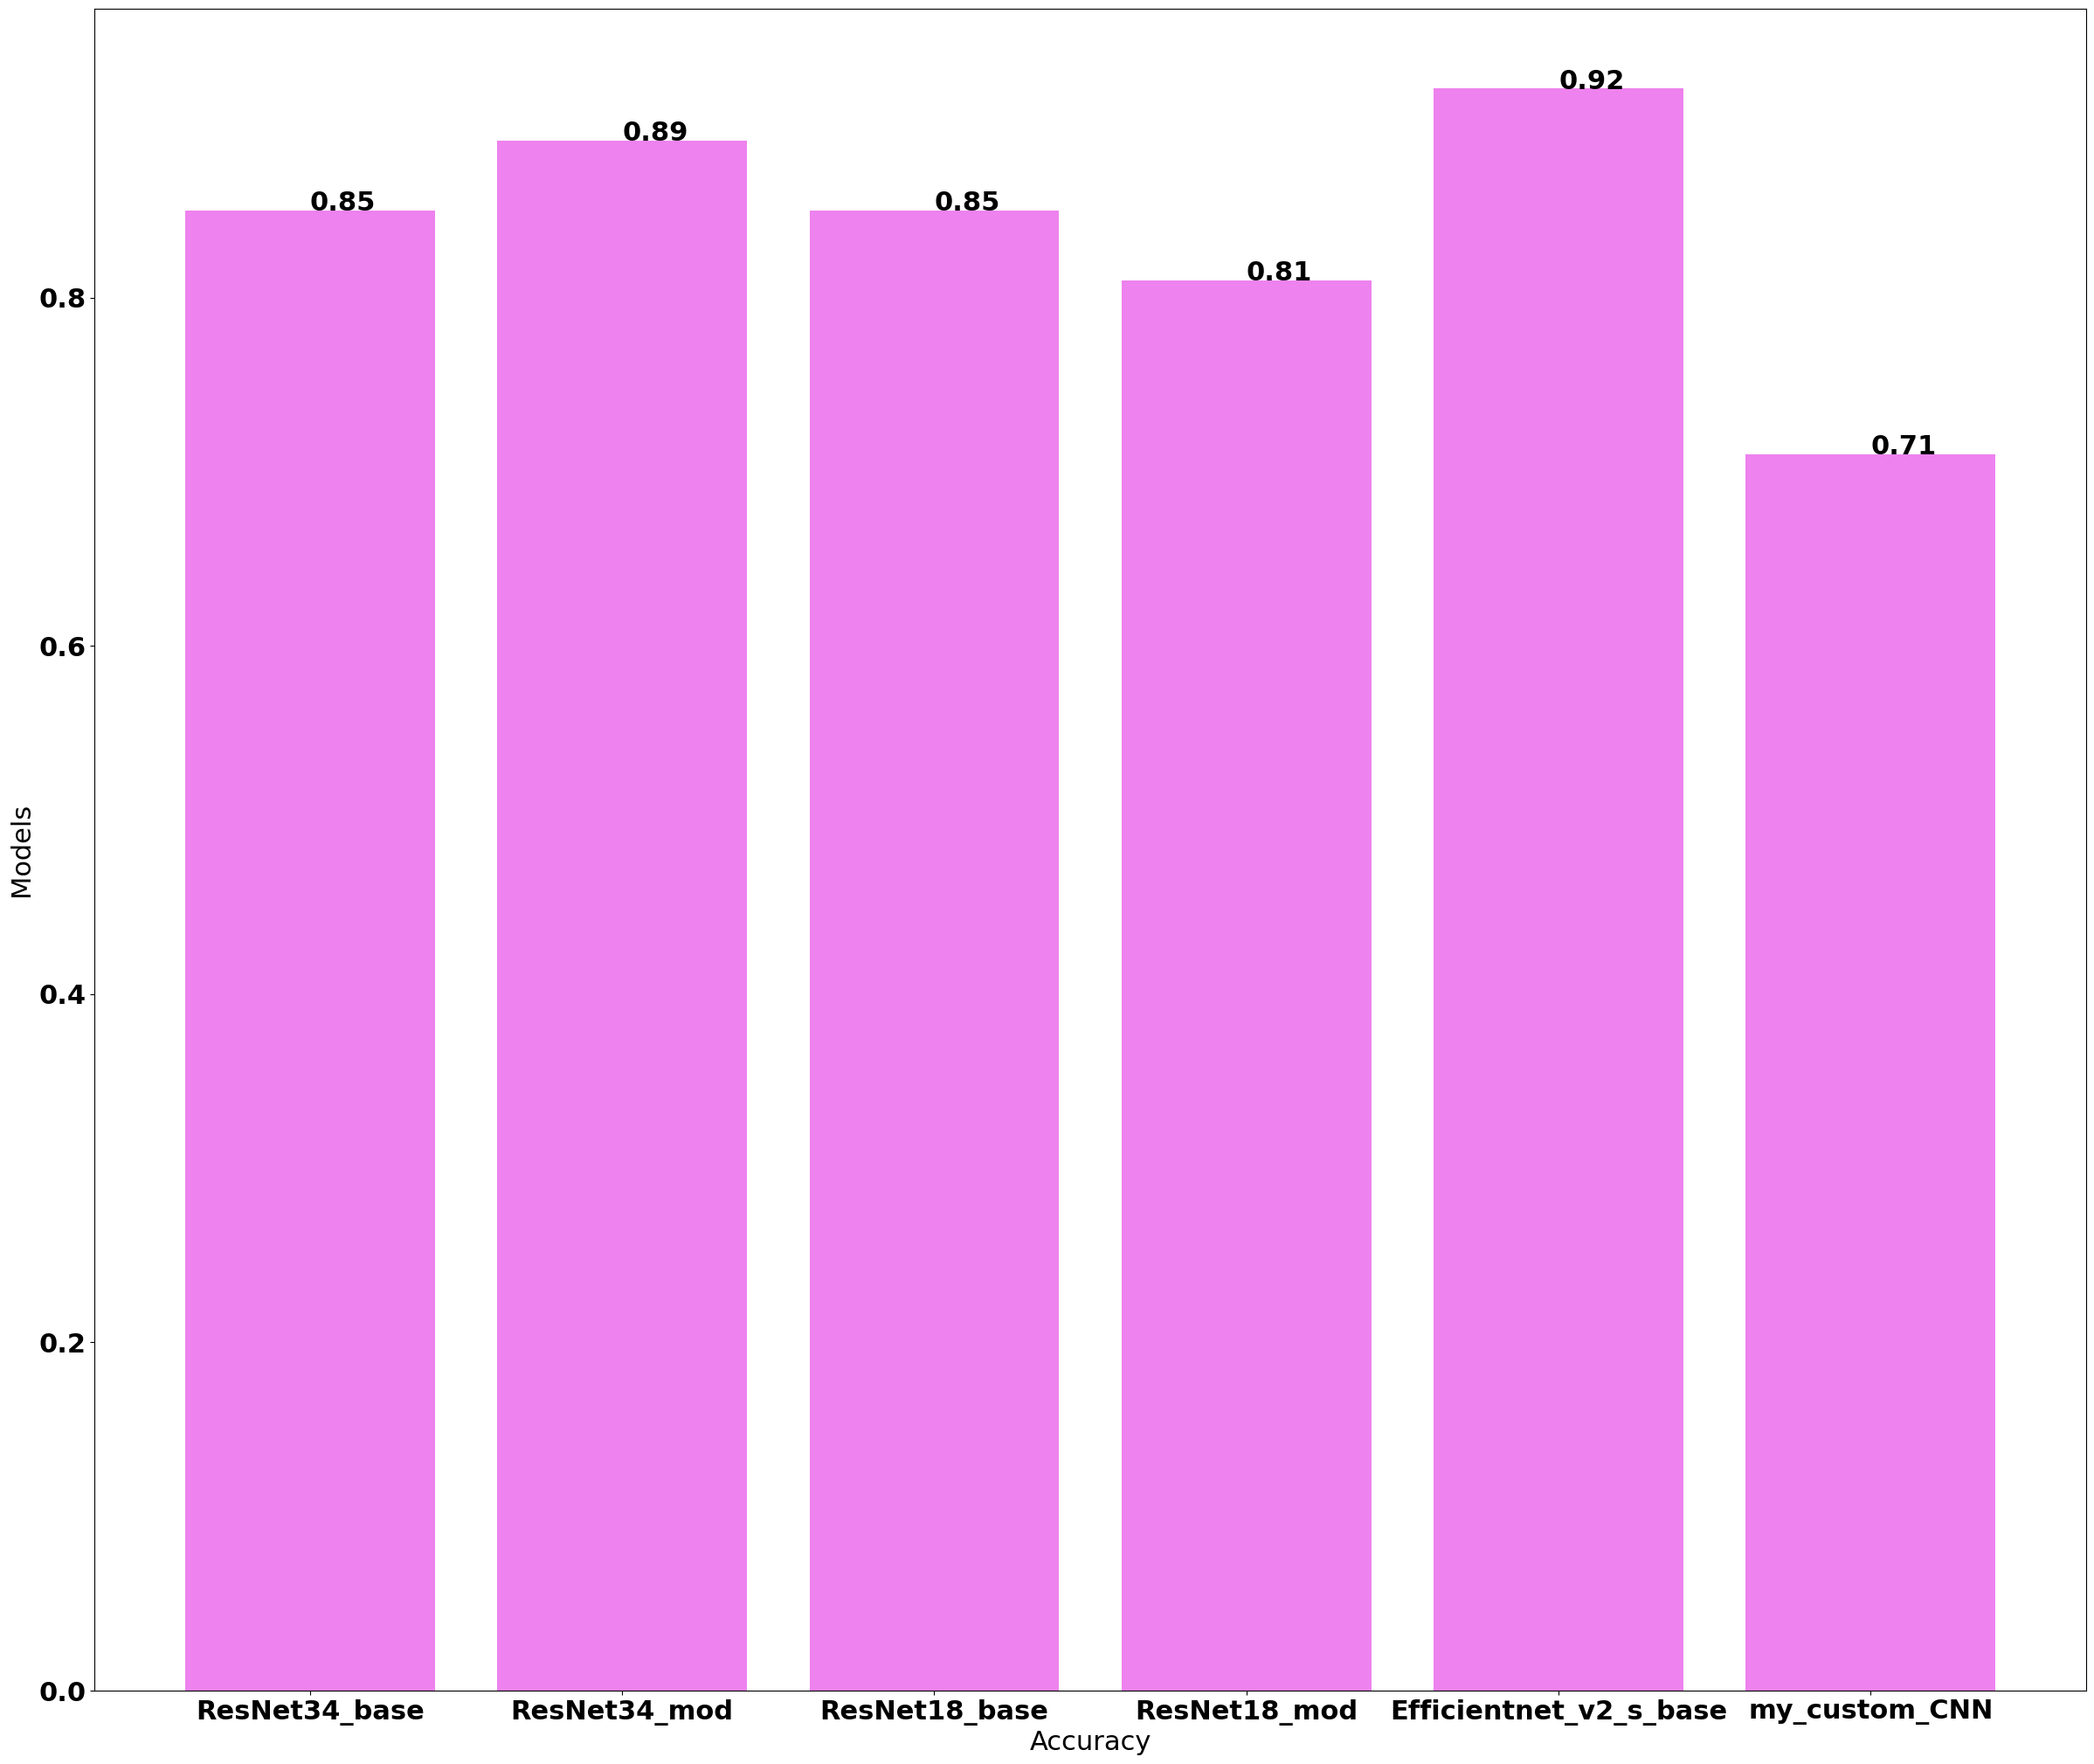

In [57]:
names = ['ResNet34_base', 'ResNet34_mod', 'ResNet18_base', 'ResNet18_mod', 'Efficientnet_v2_s_base', 'my_custom_CNN']
values = [round(float(0.8549), 2), round(float(0.8889), 2),
          round(float(test_accuracy_resnet18_first), 2), round(float(test_accuracy_resnet18_modified), 2),
          round(float(test_accuracy_efficientnet_v2_s_first), 2), round(float(0.71), 2)]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
plt.figure(figsize=(100, 25))

plt.subplot(131)
plt.xlabel('Accuracy')
plt.ylabel('Models')

# font = {'weight' : 'bold',
#         'size'   : 22}
# plt.rc('font', **font)

addlabels(names,values)
plt.rcParams.update({'font.size': 22})
plt.bar(names, values, color='violet')
